# Прогноз оттока клиентов фитнес-клуба
Разработка стратегии взаимодействия с клиентами на основе аналитических данных для сети фитнес-центров «Культурист-датасаентист». Необходимо провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток; сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.
    
В нашем распоряжении данные в виде csv-файлах подготовленные заказчиком, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Описание данных:

Данные клиента за предыдущий до проверки факта оттока месяц:
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `Churn` — факт оттока в текущем месяце.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-проведение-исследовательского-анализа-данных" data-toc-modified-id="Загрузка-и-проведение-исследовательского-анализа-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и проведение исследовательского анализа данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Подробнее-рассмотрим-дадасет,-изучим-средние-значения-и-стандартные-отклонения." data-toc-modified-id="Подробнее-рассмотрим-дадасет,-изучим-средние-значения-и-стандартные-отклонения.-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Подробнее рассмотрим дадасет, изучим средние значения и стандартные отклонения.</a></span></li><li><span><a href="#Посмотрим-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался" data-toc-modified-id="Посмотрим-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался</a></span></li><li><span><a href="#Построим-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)" data-toc-modified-id="Построим-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</a></span></li><li><span><a href="#Построим-матрицу-корреляций-и-отобразим-её-с-помощью-тепловой-карты" data-toc-modified-id="Построим-матрицу-корреляций-и-отобразим-её-с-помощью-тепловой-карты-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Построим матрицу корреляций и отобразим её с помощью тепловой карты</a></span></li></ul></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Разобьем-и-стандартизруем-данные" data-toc-modified-id="Разобьем-и-стандартизруем-данные-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разобьем и стандартизруем данные</a></span></li><li><span><a href="#Обучим-модель-логистической-регрессией" data-toc-modified-id="Обучим-модель-логистической-регрессией-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучим модель <code>логистической регрессией</code></a></span></li><li><span><a href="#Обучим-модель-случайным-лесом" data-toc-modified-id="Обучим-модель-случайным-лесом-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучим модель <code>случайным лесом</code></a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#Построим-матрицу-расстояний-функцией-linkage()-на-стандартизованной-матрице-признаков-и-нарисуем-дендрограмму." data-toc-modified-id="Построим-матрицу-расстояний-функцией-linkage()-на-стандартизованной-матрице-признаков-и-нарисуем-дендрограмму.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.</a></span></li><li><span><a href="#Обучим-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируем-кластеры-клиентов." data-toc-modified-id="Обучим-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируем-кластеры-клиентов.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.</a></span></li><li><span><a href="#Построим-распределения-признаков-по-кластерам" data-toc-modified-id="Построим-распределения-признаков-по-кластерам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Построим распределения признаков по кластерам</a></span></li><li><span><a href="#Рассчёт-доли-оттока-по-кластерам" data-toc-modified-id="Рассчёт-доли-оттока-по-кластерам-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Рассчёт доли оттока по кластерам</a></span></li></ul></li><li><span><a href="#Общий-вывод-и-рекомендации" data-toc-modified-id="Общий-вывод-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод и рекомендации</a></span></li></ul></div>

## Загрузка и проведение исследовательского анализа данных

### Загрузка данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score

In [2]:
# функция для первичного знакомства с данными
def analysis(df):
  df.columns = [x.lower().replace(' ', '_') for x in df.columns]
  print('Колличество дубликатов:', df.duplicated().sum())
  print('describe')
  display(df.describe())
  print('info')
  display(df.info())
  display(df.head(10))

Прочитаем файл и сохраним в переменной `df`

In [3]:
try:
    df = pd.read_csv('gym_churn.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
# настроим отображение всех колонок и округлим значения до сотых
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

Получим информацию о данных

In [5]:
analysis(df)

Колличество дубликатов: 0
describe


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   

None

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
5,1,1,0,0,1,1,1,34,450.74,1.00,3,2.62,2.64,0
6,1,1,1,1,0,6,1,32,94.27,6.00,2,1.14,1.28,0
7,0,1,0,0,1,1,0,30,217.79,1.00,0,1.21,1.05,1
8,1,1,1,1,1,1,1,23,45.41,1.00,1,1.11,1.06,0
9,0,1,0,0,1,1,0,31,65.31,1.00,11,1.81,1.95,0


Заменим тип данных столбца `month_to_end_contract`

In [6]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int64')

**Вывод:**

Дубликаты и пропуски в данных отсутствуют, привели данные к нужным типам и привели названия столбцов к нижнему регистру.

### Исследовательский анализ данных

#### Подробнее рассмотрим дадасет, изучим средние значения и стандартные отклонения.

In [7]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Большинство клиентов живет или работает в районе, где находится фитнес центр. Мужчин и женщин примерно равное колличество, половина клиентов являются сотрудниками компаний-партнёров, 30% клиентов пришли по акции «приведи друга». 
Большинство клиентов указали контактный номер телефона, примерно половина заключает контракт на один месяц, только 40% посещают групповые занятия, средний возраст 30 лет. 
Средняя выручка от дополнительных услуг 147, у половины клиентов абонемент заканчивается через месяц, 75% посещают фитнес центр менее 5 месяцев. 
В среднем за весь период действия абонемента клиенты делают 1-2 визита в неделю, за предыдущий месяц показатели примерно такие же. Около 27% клиентов отваливаются, показатель достаточно высокий и следует разобраться в причинах.

#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [8]:
df.groupby('churn').mean().T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


* Мужчины и женщины "отваливаются" одинаково
* Из ушедшиих клиентов меньший процент живет в районе, где находится фитнес-центр
* "Отвалвшиеся" клиенты чаще всего не являются сотрудниками компании-партнёра
* Ушедшие клиенты гораздо реже использовали акцию «приведи друга»
* Ушедшие клиенты в среднем заключали контракт на 1-2 месяца
* Действующие клиенты посещают групповые занятия гораздо чаще
* У ушедших пользователей действия контракта заканчивалось ччерез 1-2 мясяца
* Активные клиенты посещают фитнес-центр в среднем 5 месяцев, ушедшие менее месяца
* "Отвалившиеся" клиенты занимаются спортом гораздо реже активных

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


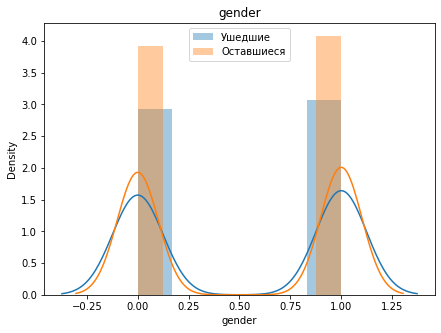

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


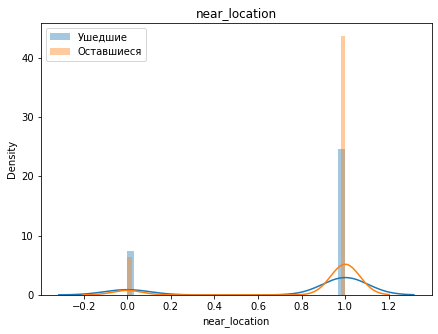

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


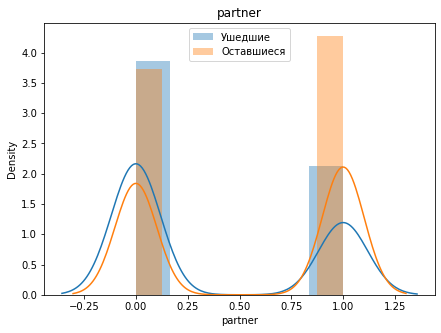

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


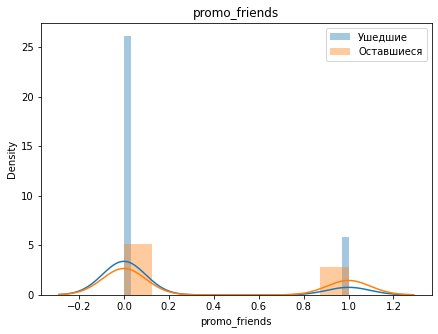

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


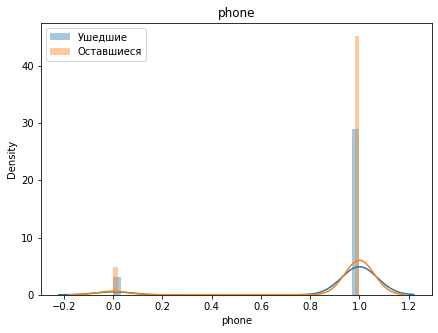

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


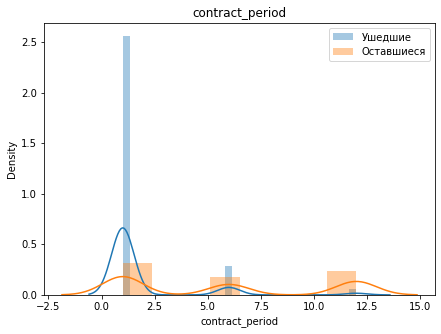

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


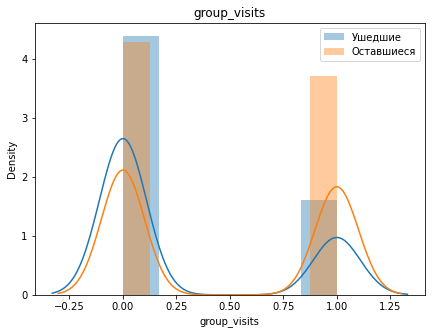

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


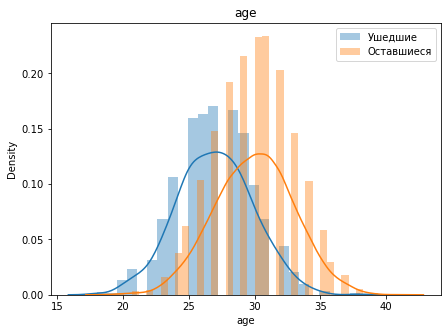

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


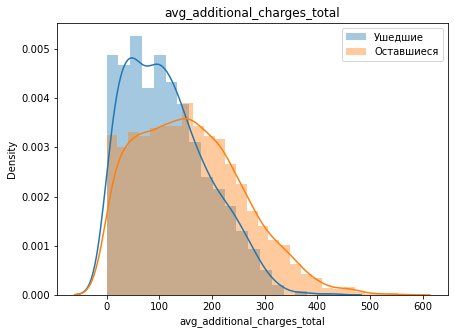

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


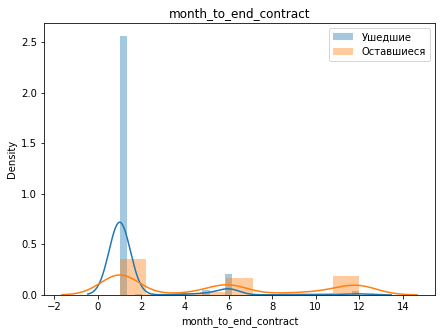

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


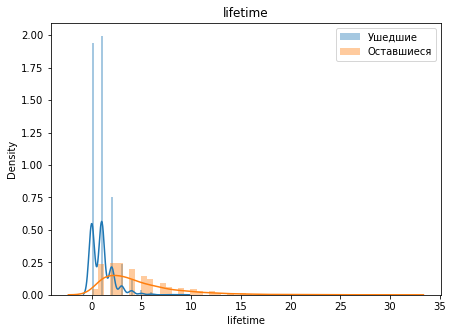

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


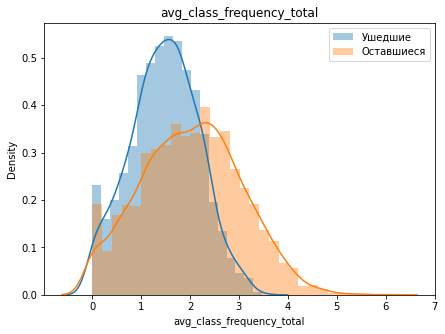

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


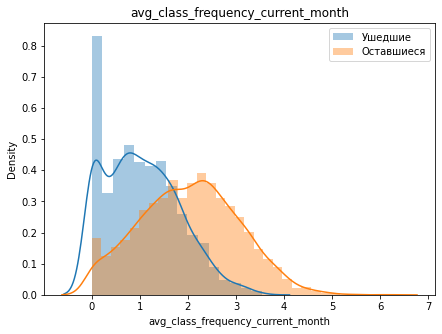

In [9]:
df_1 = df[df['churn'] == 1] #cрез с оттоком
df_0 = df[df['churn'] == 0] #cрез с оставшимися


for column in df_1.drop('churn', axis = 1).columns:
    plt.figure(figsize=(7, 5))
    sns.distplot(df_1[column], label='Ушедшие')
    sns.distplot(df_0[column], label='Оставшиеся')
    plt.title(column)
    plt.legend()
    plt.show()

* Мужчины и женщины уходят и остаются примерно одинаково
* Большинство не попавших в отток клиентов живет рядом с фитнес-центром
* Из клиентов не являющихся партнёрами уходит и остается примерно одинаковое колличество, а среди клиентов-партнёров оставшихся гораздо больше
* Клиенты заключившие контракт не по акции "приведи друга" уходят очень часто, при этом клиенты заключившие контракт по этой акции так же уходят чаще, чем остаются
* Люди указавшие контактный телефон остаются чаще
* Очень часто уходят клиенты заключающие контракт на один месяц, в целом это логично
* Люди учавствующие в групповых занятиях в большинстве случаев остаются
* Более молодые клиенты уходят чаще
* Клиенты приносящие бОльшую выручку по доп услугами уходят чаще
* Очень часто уходят клиенты, у которых срок действия абонемента истекает через месяц
* Постоянные клиенты чаще всего остаются, а вот "новенькие" часто уходят на первом втором или третьем лайфтайме
* Чаще всего уходят клиенты посещающие фитнес центр менее 2х раз в неделю

#### Построим матрицу корреляций и отобразим её с помощью тепловой карты

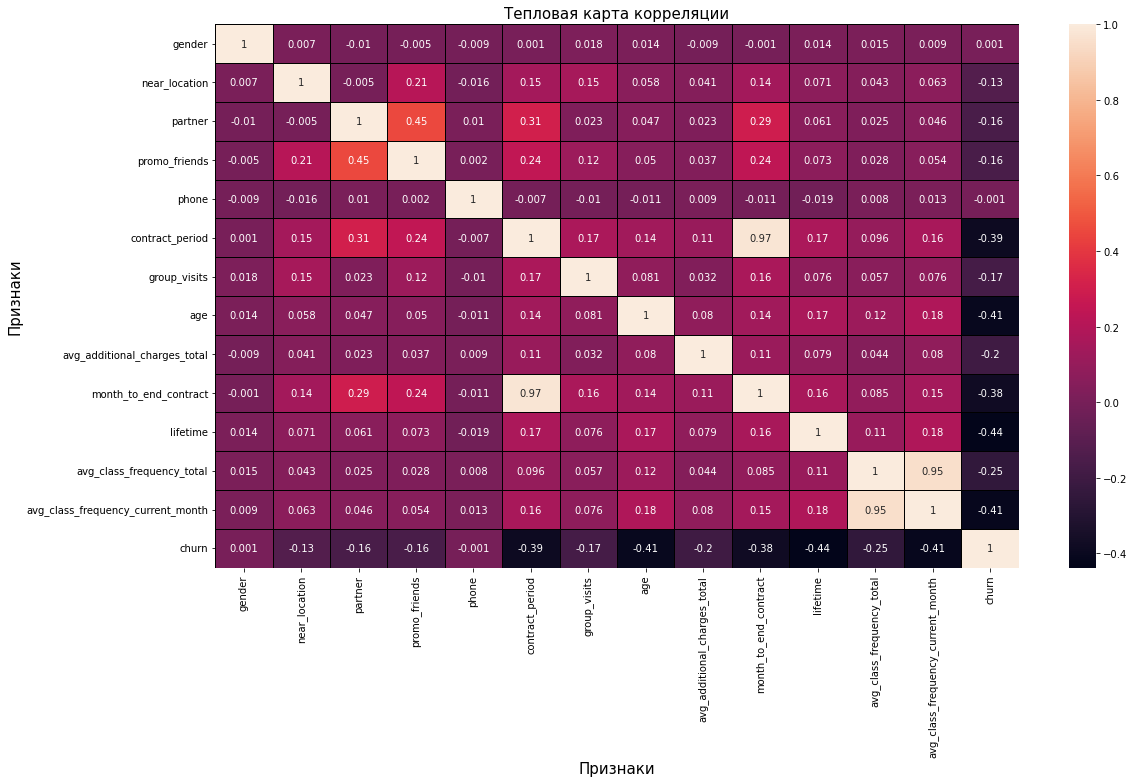

In [10]:
corr_m = df.corr().round(3)
plt.figure(figsize = (18, 10))
sns.heatmap(corr_m,  annot = True, fmt='.2g', linewidths=.5, linecolor='black')
plt.title('Тепловая карта корреляции', fontsize = 15)
plt.xlabel('Признаки', fontsize = 15)
plt.ylabel('Признаки', fontsize = 15)
plt.show()

В данных присутствуют мультиколлинеарные признаки, корреляция которых выше 0.95, так же имеются признаки не коррелирующие ни с одним признаком, например `gender`.

**Вывод:**

* Чаще всего являются клентами проживающие или работающие в районе фитнес-центра, мужчин и женщих среди клиентов равное колличество, около половины являются партнёрами. Групповыми занятиями пользуются только 40% клиентов. Отток составляет приблизительно 27% и это достаточно большой процент.
* Выяснили, что клиенты проживающие в районе фитнес-центра хорошо удерживаются, часто становятся постоянными клиенты-партнёры, а клиенты не воспользовавшие акцией "приведи друга" очень часто попадают в отток, возможно фитнес центру следует развивать это направление. Клиенты с действующим абонементом на срок один месяц часто уходят, фитнес центру следует проработать стратегию по их удержанию. Так же следует привлекать больше клиентов на групповые занятия т.к они остатся чаще. Чем больше визитов клиенты делают в неделю, тем чаще они остаются.
* В данных присутсвуют мультиколлинеарные признаки, учтём это при постоении модели линейной регрессии.

## Построение модели прогнозирования оттока клиентов
Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

### Разобьем и стандартизруем данные

Разделим наши данные на признаки `X` и целевую переменную `y`

In [11]:
X = df.drop('churn', axis = 1)
y = df['churn']

Разделим данные на обучающую и валидационную выборку:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Проведем стандартизацию данных:

In [13]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Обучим модель `логистической регрессией`

In [14]:
# зададим алгоритм для модели
model = LogisticRegression(random_state=0)

# обучим модель
model.fit(X_train_st, y_train)

# делаем прогноз
lr_predictions = model.predict(X_test_st)

lr_probabilities = model.predict_proba(X_test_st)[:,1]

Получим метрики модели:

In [15]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83


Метрики достаточно высокие, модель линейной регрессии работает хорошо.

**Удалим коррелирующие признаки, построим модель логитической регрессии по новым данным и сравним метрики**

In [16]:
df_2 = df.drop(['contract_period', 'avg_class_frequency_current_month'], axis=1)

Обучим модель `логистической регрессии` на ощищенных данных

In [17]:
X = df_2.drop('churn', axis = 1)
y = df_2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели
model = LogisticRegression(random_state=0)

# обучим модель
model.fit(X_train_st, y_train)

# делаем прогноз
lr_predictions = model.predict(X_test_st)

lr_probabilities = model.predict_proba(X_test_st)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Accuracy: 0.90
Precision: 0.78
Recall: 0.81


Эксперимент показал, что удаление коррелирующих признаков негативно влияет на метрики модели логистической регрессии, соответственно необходимо использовать данные со всеми имеющимися признаками.

### Обучим модель `случайным лесом`

In [18]:
# зададим алгоритм для модели
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель 
rf_model.fit(X_train_st, y_train)

# делаем прогноз
rf_predictions = rf_model.predict(X_test_st)

rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Получим метрики модели:

In [19]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.90
Precision: 0.80
Recall: 0.77


Модель случайного леса очень хорошо предсказывает наши признаки.

**Вывод:**

Модель лнейной регрессии на данных с мультиколлинеарными признаками показала себя лучше всех, при этом метрики достаточно хорошие и у модели случайного леса. В данном случае стоит использовать данные со всеми признаками.

## Кластеризация клиентов

### Стандартизация данных

In [20]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc  = scaler.fit_transform(df.drop(columns = ['churn'])) # обучаем нормализатор и преобразуем набор данных 

### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

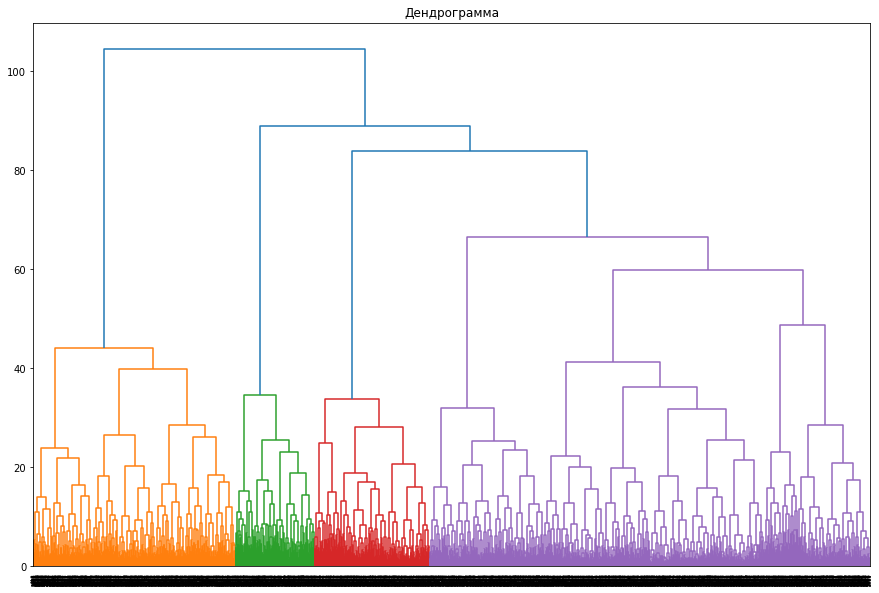

In [21]:
linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

На основе дендограммы можем выделить 5 кластеров

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 

**Число кластеров принимаем n=5**

In [22]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(x_sc)
df['cluster'] = labels

Посмотрим на средние значения признаков для кластеров:

In [23]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


Самым качественным кластером по оттоку является `0`, в этом кластере половина клиентов пришли по акции "приведи друга", а так же действия контракта у этих клиентов в среднем истекает через 10 месяцев. Второй и третий кластер являются наименее качественными, т.к. процент оттока в этих группах достаточно велик.

### Построим распределения признаков по кластерам

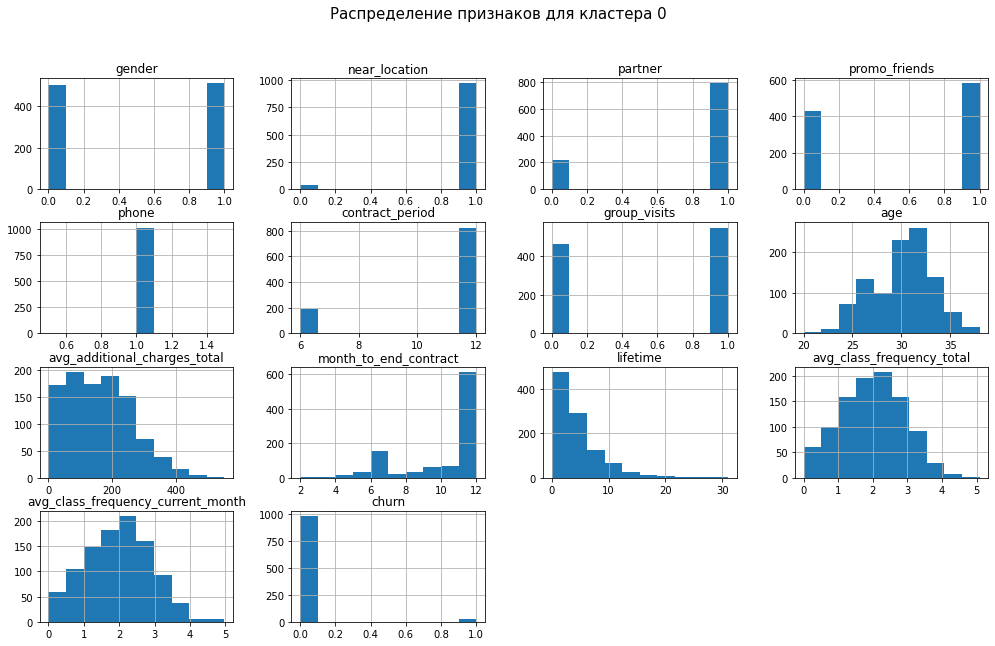

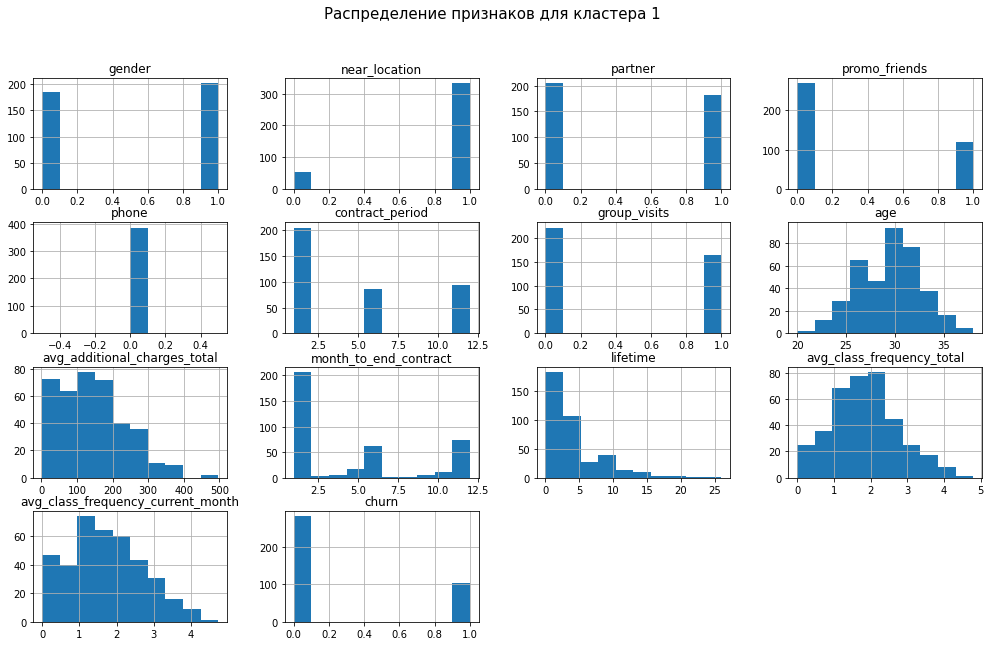

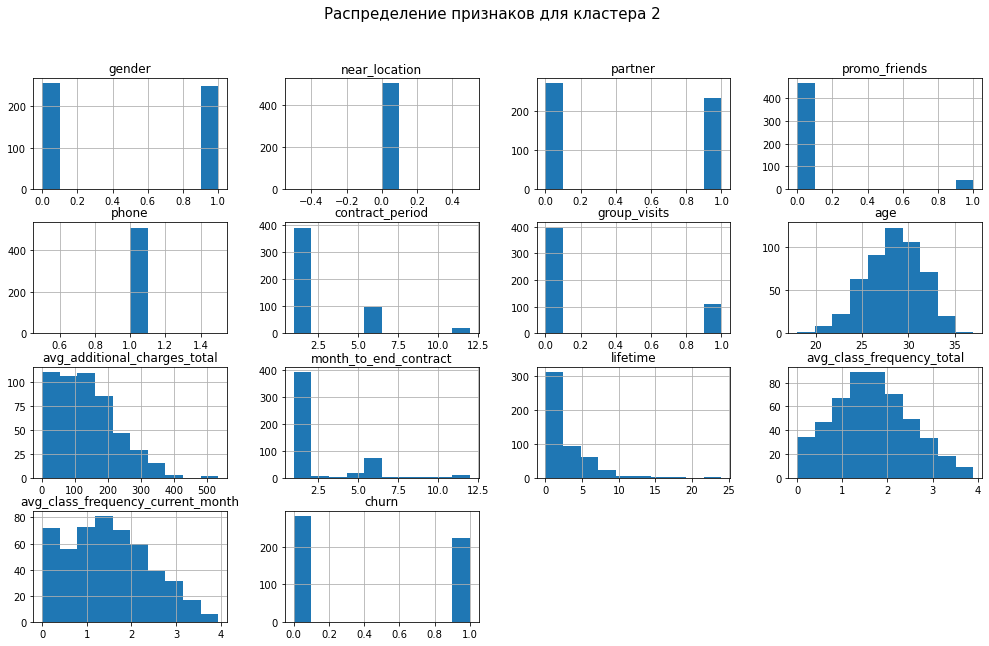

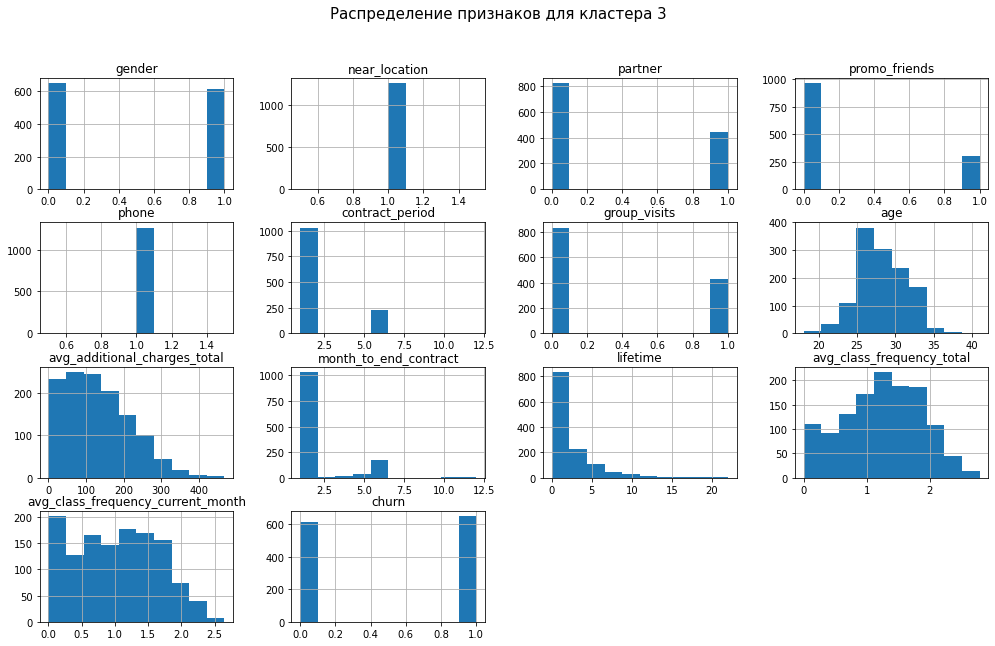

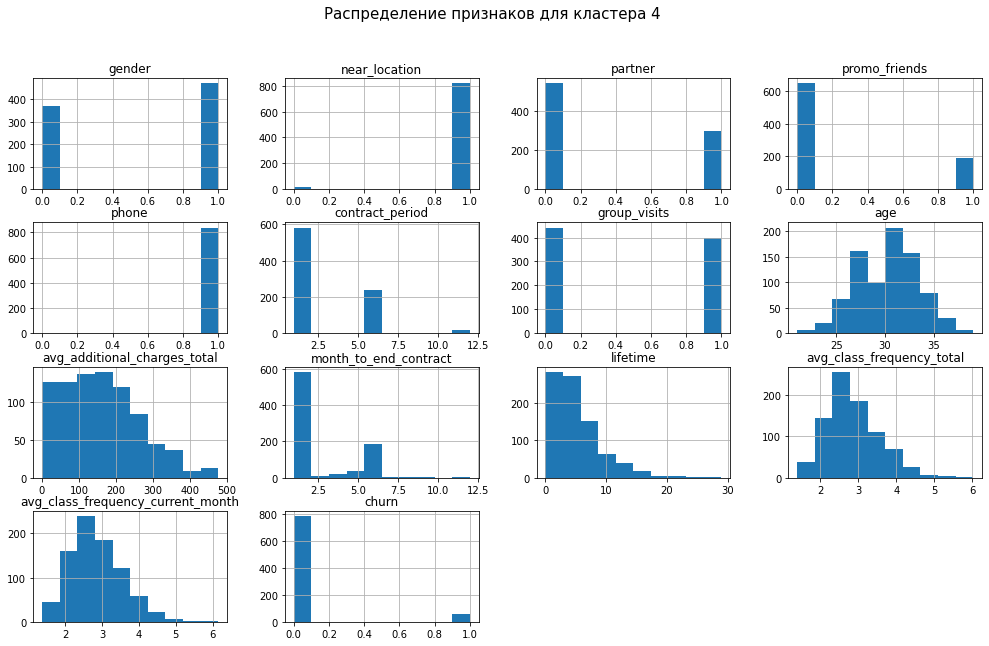

In [24]:
for cluster in df['cluster'].sort_values().unique():
  df.loc[:, 'gender':'churn'][df['cluster']==cluster].hist(figsize=(17,10))
  plt.suptitle('Распределение признаков для кластера {}'.format(cluster), fontsize = 15)
  plt.show()

* На распределениях признаков по кластерам видно, что по полу клиенты распределены равномерно во всех кластерах, кроме 4
* В кластер 2 попали только клиенты, которые не живут и не работают в районе фитнес-центра, при этом удержание у этих клиентов очень низкое, клиенты проживающие или работающие в районе фитнес-центра удерживаются лучше друих
* Явный перекос в сторону клиентов-партнёров получился в кластере 0
* Ксластер 0 выделяется колличеством клиентов пришедших по акции "приведи друга"
* В кластере 0 почти все клиенты заключили контракт на 12 месяцев
* Кластер 0 является единственным клатером, в котором большая асть клиентов посещает групповые занятия
* Существует небольшая закономерность возраста и удержания, чем клиенты старше, тем лучше они удерживаются
* Кластер 0 является единственным, в котором контракт у клиентов чаще всего заканчивается на 12 месяцев
* Лучше всего по оттоку показывают себя кластеры 0 и 4

### Рассчёт доли оттока по кластерам

In [25]:
churn_cl = df.groupby('cluster').agg({'churn':'mean'}).reset_index()
churn_cl['churn'] = churn_cl['churn'] * 100
churn_cl

,cluster,churn
0,0,2.77
1,1,26.75
2,2,44.36
3,3,51.43
4,4,6.80


Посчитаем колличество клиентов по кластерам:

In [26]:
df.groupby('cluster').count()['gender'].reset_index().sort_values('gender', ascending=False)

,cluster,gender
3,3,1262
0,0,1010
4,4,838
2,2,505
1,1,385


Самый большой отток в кластере 3, половина клиентов из этого кластера уходят, кластере 2 уходят около 45% клиентов. Самым устойчивым является кластер 0, в нем уходят всего 3% клиентов и он является вторым по численности.

## Общий вывод и рекомендации

* В ходе работы были выявлены некоторые закономерности признаков и оттока. Более качетвенными клиентами являются те, которые проживают или работают в районе фитнес-центра, являются партнёрами, пришли по акции "приведи друга", заключают контракт на долгий срок, а так же посещают групповые занятия. Так же есть небольшая закономерность по возрасту, более взрослые удерживаются лучше.
* В качестве рекомендации для фитнес-центра, можно сказать, что следует привлекать больше клиентов проживающих в районе фитнес-центра и клиентов-партнёров. Необходимо предусмотреть более выгодные условия для долгосрочных контрактов, у клиента должны быть мотивация для заключение такого контракта, к примеру, можно предусмотреть на долгосрочные контракты и делать акцент на их выгодности при продаже абонемента. Так же рекомендую развивать направление групповых занятий и привлекать на такие занятия больше клиентов. Для клиентов впервые заключивших контракты на короткий период можно предусмореть систему скидок на последующие контракты, т.к.эти клиенты находятся в зоне риска. 